# Simple Regression Model

In [2]:
#Importing everything I need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
#Creating my x data
x_data = np.linspace(0.0, 10.0, 1000000)
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [4]:
#Creating noise to add to Y data
noise = np.random.randn(len(x_data))
noise

array([ 1.64399429, -1.23309316,  1.71218505, ...,  1.54829692,
       -0.78983535, -0.80228702])

### y = (0.5 * x_data) + 5 + noise

In [5]:
# Going to create the y data using the formula above
y_data = (0.5 * x_data) + 5 + noise
y_data

array([ 6.64399429,  3.76691184,  6.71219505, ..., 11.54828692,
        9.21015965,  9.19771298])

In [6]:
#Creating the x dataframe
x_df = pd.DataFrame(x_data, columns=['X'])
x_df.head()

,X
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [7]:
#Creating the y dataframe
y_df = pd.DataFrame(y_data, columns=['Y'])
y_df.head()

,Y
0,6.643994
1,3.766912
2,6.712195
3,4.730428
4,4.679579


In [8]:
my_data = pd.concat([x_df, y_df], axis=1)
my_data.head()

,X,Y
0,0.00000,6.643994
1,0.00001,3.766912
2,0.00002,6.712195
3,0.00003,4.730428
4,0.00004,4.679579


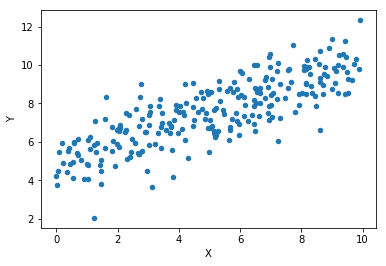

In [9]:
#Graphing the data using pandas dataframe
my_data.sample(n=250).plot(kind='scatter', x ='X', y='Y')

In [10]:
#Setting batch size
batch_size = 8

In [11]:
#Getting two random values
rand = np.random.randn(2)
rand

array([0.28304605, 1.13961082])

In [12]:
#Setting the M and b variables to the random variables I got
m = tf.Variable(float(rand[0]))
b = tf.Variable(float(rand[1]))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#Creating the Placeholders
yph = tf.placeholder(tf.float32, [batch_size])
xph = tf.placeholder(tf.float32, [batch_size])

In [14]:
#Creating the model
y_model = m * xph + b

In [15]:
#Creating Error
error = tf.reduce_sum(tf.square(yph-y_model))

In [16]:
#Optimizing the model
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train = optimizer.minimize(error)

In [17]:
init = tf.global_variables_initializer()

In [18]:
#Training the modal by batches
with tf.Session() as sess:  
    
    sess.run(init)
    batches = 50000
    
    for _ in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_data[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        m_model, b_model = sess.run([m,b])

In [19]:
#Printing the thw weights after training
print(m_model, b_model)

0.50338125 5.0039825


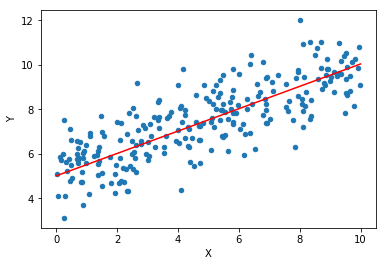

In [20]:
#Graphing the result
y_hat = m_model * x_data + b_model
my_data.sample(250).plot(kind='scatter', x='X',y='Y')
plt.plot(x_data, y_hat, 'r')

# TF Estimator

In [22]:
#Creating a the input column for the network 
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ]

In [23]:
#Creating estimator to train the model
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmpwz90tcxo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x137a61710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
#Importing sklearn to split thr data into training and testing set
from sklearn.model_selection import train_test_split

In [26]:
#Doing the train/test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=101) 

In [28]:
#Printing the shape
print(x_train.shape, x_test.shape)

(700000,) (300000,)


In [32]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_data, batch_size=8, num_epochs=None, shuffle=True)

In [33]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_data, batch_size=8, num_epochs=1000, 
                                                     shuffle=False)

In [34]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test, batch_size=8, num_epochs=1000, 
                                                     shuffle=False)

In [ ]:
estimator.train(input_fn=)